In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [8]:
df = pd.read_csv('/spam.csv', encoding='latin-1')
df = df[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'message'})
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

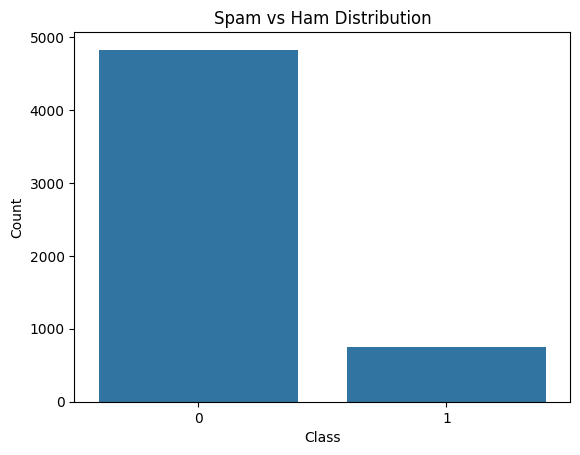

In [10]:
sns.countplot(x=df['label'])
plt.title("Spam vs Ham Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

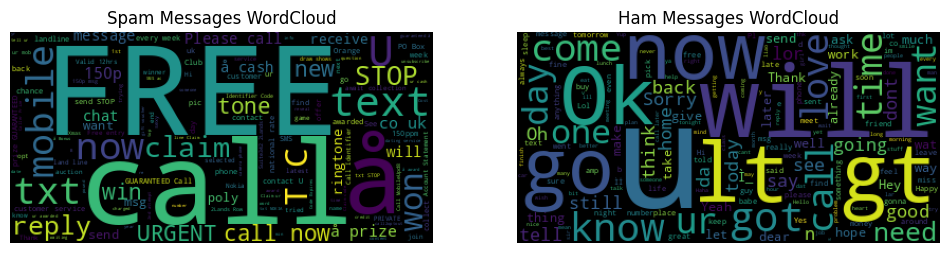

In [11]:
spam_words = " ".join(df[df['label'] == 1]['message'])
ham_words = " ".join(df[df['label'] == 0]['message'])
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=400, height=200, background_color='black').generate(spam_words))
plt.title("Spam Messages WordCloud")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(WordCloud(width=400, height=200, background_color='black').generate(ham_words))
plt.title("Ham Messages WordCloud")
plt.axis("off")
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

In [13]:
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [14]:
models = {
    "Naïve Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}


Naïve Bayes Model Performance:
Accuracy: 0.9668161434977578
Precision: 1.0
Recall: 0.7533333333333333
F1 Score: 0.8593155893536122
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



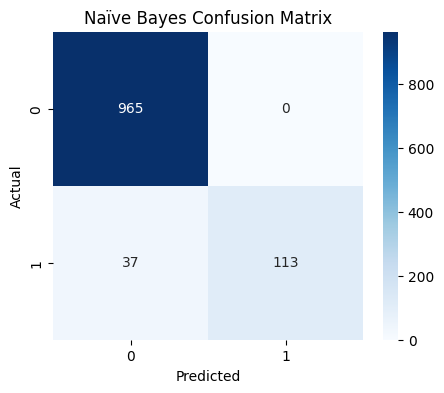


Logistic Regression Model Performance:
Accuracy: 0.9524663677130045
Precision: 0.970873786407767
Recall: 0.6666666666666666
F1 Score: 0.7905138339920948
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



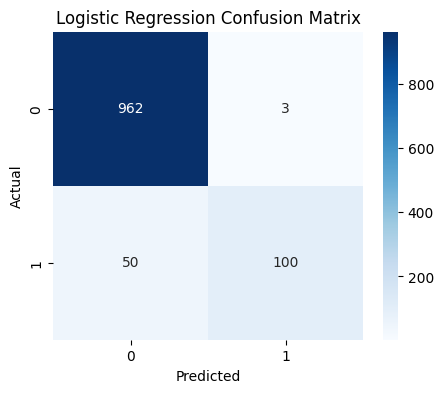


Random Forest Model Performance:
Accuracy: 0.9766816143497757
Precision: 0.9920634920634921
Recall: 0.8333333333333334
F1 Score: 0.9057971014492754
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



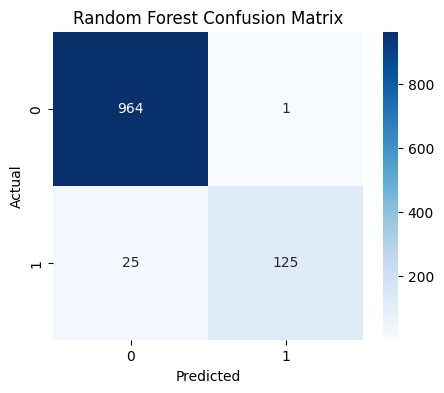

In [15]:
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    print(f"\n{name} Model Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion matrix visualization
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [16]:
test_email = "Congratulations! You've won a free iPhone. Click here to claim your prize."
test_email_tfidf = vectorizer.transform([test_email])
nb_prediction = models["Naïve Bayes"].predict(test_email_tfidf)
print("Prediction:", "Spam" if nb_prediction[0] == 1 else "Not Spam")

Prediction: Spam
